In [ ]:
#Importe de paquetes:
import numpy as np
from numpy.linalg import eig
import pandas as pd
from pandas import read_excel
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
import scipy as sp
import scipy.sparse.linalg
import time
import seaborn as sns

**1 Estabilidad y Eficiencia**

1.1

In [ ]:
#Se crea una función que genera las matrices de adyacencia, tomando como insumo listas que albergan combinatorias (0 y 1).
#Se crea condicional para comparar el tamaño de la matriz dado el número de nodos y combinatorias.
#Luego creamos una lista que va albergar los valores asignados a cada nodo.
#Se pegan los valores (0,1) a una sublistas para luego ser transpuesta.
def matrix_creator(list, n):
    m=len(list)
    if 2*m==(n*(n-1)):
        counter=1
        A=[]
        AA=[0 for i in range(n)]
        while counter<n+1:
            limit=n-counter
            B=list[:limit]
            lista=list[limit:]
            C=AA[:counter]+B
            A.append(C)
            counter+=1
        A=np.array(A)
        return A+np.transpose(A)
    else:
        print("Fill with right inputs")

In [ ]:
#Creación de función que genera una red de longitud (tamaño) n:

#Se inicializa dos (2) listas que van albergar las conexiones (1 para link entre ij, 0 de lo contrario).
#Se crea una función contadora y otra de almacenamiento que van a iterar entres los nodos y guarda los resultados de las combinatoria entre los nodos.
#Finalmente, se reporta a través de una suma de listas una red de tamaño n.
def network_creator(n):
    A=[0]*n
    B=[1]*n
    saver=set()
    counter=1
    while counter<n:
        C=B[:counter]+A[counter:]
        saver=saver.union(set(it.permutations(C,n)))
        counter+=1
    saver=[list(i) for i in saver]
    saver=[A]+saver+[B]
    return(saver)

In [ ]:
#Construcción de redes de cinco (5) nodos y sus matrices adjuntas:

#Se fija el numero de nodos de la red n = 5.
#Luego, se calcula el numero maximo de enlaces.
#Posteriormente, se crea la matriz de adyacencia para los cinco (5) nodos y se construye la red.
#Cierra con una lista que guarda la asignación generada en la matriz de adyacencia.
n=5
long=int(((n-1)*n)/2)
adjM=[matrix_creator(i,n) for i in network_creator(long)]
gs=[nx.from_numpy_array(i) for i in adjM]

In [ ]:
#Creación de función que revisa las redes isomorfas:

#Se crea un diccionario que va permitir verificar el insomorfismo de los valores guardados en la lista "gs" a tarvés de bucles anidados, 
#se recorrer la lista "gs" para verificar los valores idénticos.
#Finalmente, se crea una (1) matriz adjunta que almacena los valores definitvos de la red.
revisor={i:True for i in range(len(gs))}
for i in revisor:
    for j in revisor:
        if j>i and revisor[i] and revisor[j] :
            if nx.is_isomorphic(gs[i], gs[j]):
                revisor[j]=False

gs_def=[gs[i] for i in revisor if revisor[i]]
adjM_def=[adjM[i] for i in revisor if revisor[i]]

1.2

In [ ]:
#Creación de función de utilidad que nos permite generar las utilidades relevantes. Esta crea un diccionario con llaves=nodos i y valores=u_i(grafo):

#Se contruye con el atributo grafo, y luego calcula con base en este las utlidades para cada nodo.
#Se construye la función de utlidad a partir del grado e itera para cada nodo.
def utility_function(grafo):
    utility_0=dict(grafo.degree())
    utility={i:(utility_0[i])**0.5 for i in utility_0}
    return utility

In [ ]:
#Construcción de un objeto con las utilidades de cada nodo:

#Se crea una lista que guarda la utlidad calculada para cada nodo a partir de la función creada en el item anterior y los registros de las redes isomorfas.
#Empleando la función nx.set_node_attributes se le asigna estos valores a cada nodo y guarda.
utilities=[utility_function(i) for i in gs_def]
for i in range(len(gs_def)):
    nx.set_node_attributes(gs_def[i], utilities[i], "Utility")

1.3

In [ ]:
#Definición de la lista de utilidades totales de todos los grafos. La utilidad total de cada grafo se define como la sumatoria de las utilidades de cada nodo:
social_utility=[sum(list(nx.get_node_attributes(gs_def[i], "Utility").values())) for i in range(len(gs_def))]
#Obtención el valor máximo entre todas las utilidades:
max_social_utility=max(social_utility)
#Se crea una lista que guarda los grafos con max_social_utility, para esto se compara los valores guardados en la lista social_utility y luego compara con el valor máximo de esta.
gs_SE=[gs_def[i] for i in range(len(social_utility)) if social_utility[i]==max_social_utility]

#Imprimir los grafos:
for i in gs_SE:
    print("_"*30)
    nx.draw(i)

1.4

In [ ]:
#Análogo al item anterior, se construye una lista que guarda las utilidades de cada grafo:
utilities_i=[list(nx.get_node_attributes(gs_def[i], "Utility").values()) for i in range(len(gs_def))]
gs_PE=[]

#Se itera sobre todos los grafos posibles extrayendo una lista que calcula para cada grafo k, el número de nodos que son mayores o 
#iguales en el grafo j. Si el número maximo de nodos mayores o iguales a la red j es menor a cinco (5) significa que no existe otra red 
#que pueda mejorar la utilidad de la menos un (1) nodo y mantener la de los demás costante.
#Finalmente crea una lista que guarda las redes Pareto-eficientes. 
for k in range(0,len(gs_def)):
    a=([sum(np.greater_equal(utilities_i[j], utilities_i[k])) 
    for j in range(0,len(gs_def)) if j!=k and sum(np.equal(utilities_i[j], utilities_i[k]))!=5])
    if max(a)<5:
        print(k)
        gs_PE=gs_PE+[gs_def[k]]

#Imprimir los grafos:
for i in gs_PE:
    print("_"*30)
    nx.draw(i)

1.5

In [ ]:
#Se define una lista con las utilidades de cada grafo. 
utilities_i=[list(nx.get_node_attributes(gs_def[i],"Utility").values()) for i in range(len(gs_def))]

#Se crea una lista que contiene los grados de cada nodo para todos los grafos contenifos en gs_def.
degrees=[list(dict(gs_def[j].degree).values()) for j in range(len(gs_def))]
#Lista vacias que se utilizaran en el loop. 
gs_E=[]

#Se realiza un loop que compara las utilidades de cada nodo para cada grafo con los nodos de los grafos restantes que poseen un (1) grado mas
#o un (1) grado menos. Si la utilidad de un nodo h es mayor en el grafo z que en el k, entonces se retorna un verdadero en la posición del nodo 
#de la lista compututilities. Esta lista se suma y, si las sumas de cada lista computilities para los grafos z distintos de k dan como 
#resultado todas al tiempo cero (0), entonces quiere decir que ningun nodo del grafo k tiene incentivos a crear o destruir enlaces, por lo que 
#dicho grafo se guarda en la lista de grafos estables gs_E.
for k in range(0,len(gs_def)):
   degrees_k=degrees[k]
   sumcu=[]
   for z in range(0,len(gs_def)):
      if z!=k:
         degrees_z=degrees[z]
         utilities_ik=utilities_i[k]
         utilities_iz=utilities_i[z]
         computilities=([np.greater(utilities_iz[h],utilities_ik[h])
         for h in range (0,5) if degrees_k[h]-1==degrees_z[h] or degrees_k[h]+1==degrees_z[h]])
         sumcu+=[sum(computilities)]
   if max(sumcu)==0:
      gs_E+=[gs_def[k]]

#Imprimir los grafos:
for i in gs_E:
    print("_"*30)
    nx.draw(i)

1.6

In [ ]:
#Se genera una lista con la suma de las utilidades para cada uno de los grafos estables estimados en el item anterior (1.5).
utilities_E=([sum(list(nx.get_node_attributes(gs_E[i],"Utility").values())) for i in range(len(gs_E))])
#Luego se calcula la máxima y mínima utilidad entre los grafos estables, a partir de las utlidades guradas en utilities_E.
UEmax=max(utilities_E)
UEmin=min(utilities_E)
#Finalmente se estima el precio estable (PE) y precio de anarquía (PA) a partir de la utilidad social estiamda en el punto 1.3.
PE=max_social_utility/UEmax
PA=max_social_utility/UEmin
print(PE, PA)

**2 Medidas sobre Redes**

2.1

In [ ]:
#Se extrae una lista con todos los nodos de origen: 

#Volvemos esa lista una columna del data frame. 
#Usamos la funcion de value_counts normalizada para ver cuántos representan de la poblacion total.
#Devuelve una serie donde la columna cero (0) es el identificador del nodo y la columna uno (1) es la cantidad de nodos del cuál es el origen de manera normalizada.

def Hubs(Network, percen):
    df=pd.DataFrame()
    Hubs=[i[0] for i in Network.edges()] 
    df["Hubs"]=Hubs 
    Hubs=df["Hubs"].value_counts(normalize=percen) 
    return Hubs 

2.2

In [ ]:
#Se extrae en una lista todos los nodos de destino:

#Volvemos esa lista una columna del data frame.
#Usamos la funcion de Value_counts normalizada para ver cuantos representan de la poblacion total
#Devuelve una serie donde la columna cero (0) es el identificador del nodo y la columna uno (1) es la cantidad de nodos del cual el es destino de manera normalizada.

def Author(Network, percen):
    df=pd.DataFrame()
    Author=[i[1] for i in Network.edges()] 
    df["Author"]=Author 
    Author=df["Author"].value_counts(normalize=percen) 
    return Author 

2.3

In [ ]:
def Bonanich(Network):
    M=nx.to_numpy_matrix(Network) #Extraer la matriz de adyacencia.
    auva, auve=sp.sparse.linalg.eigs(M, k=1) #Hallar el autovector y el autovalor.
    auve_G=auve.flatten().real #Pasar de una matriz a una lista.
    norm=np.sign(auve_G.sum())*np.linalg.norm(auve_G)
    vectores=(auve_G/norm).astype(float) #Los lamdas que resuelven la ecuación.
    centrality=dict(zip(g_twi, vectores)) #Mapea entre los nodos y los vectores anteriormente descritos.
    return centrality

2.4

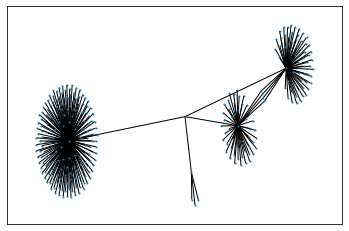

In [24]:
#Cargue de la base de datos ->configure aquí su directorio<-:
os.chdir("C:/Users/ASUS/Documents/Universidad de los Andes/2022-2/Modelos de Interacciones Sociales/Taller 1/T1_MIS_201921573_201813007_201924300_201815561.zip/Inputs")
twi=pd.read_csv("2020_20_MIS_T1_Twitter.csv") 
twi.pop("Unnamed: 0")
g_twi=nx.Graph()
g_twi=nx.from_pandas_edgelist(twi, source="From", target="To")
M_twi=nx.to_numpy_matrix(g_twi)
nx.draw_networkx(g_twi,with_labels=False, node_size=1)
plt.show()

2.5

In [ ]:
HUBS=Hubs(g_twi, percen=True) #Se corre la funcion con la información de Twitter.
s=pd.Series(HUBS, name="HUBS") 
s=s.to_frame().reset_index() #Se vuelve la serie un data frame. 
s.columns=["ID (nodo)", "Hubs"]
s=s.sort_values(by="Hubs", ascending=False) #Se organiza de mayor a menor.
HUBS=s
HUBS

In [ ]:
AUTHOR=Author(g_twi, percen=True) #Se corre la función con la información de Twitter.
s=pd.Series(AUTHOR, name="AUTHOR") 
s=s.to_frame().reset_index() #Se vuelve la serie un data frame. 
s.columns=["ID (nodo)", "Authorities"]
s=s.sort_values(by="Authorities", ascending=False) #Se organiza de mayor a menor.
AUTHOR=s 
AUTHOR

In [ ]:
BONA=Bonanich(g_twi) #Se corre la función con la información de Twitter.
s=pd.DataFrame.from_dict(BONA, orient="index", columns=["Bonanich"]) #Se crea un data frame de el diccionario
s=s.reset_index() 
s.columns=["ID (nodo)","Bonanich"]
s=s.sort_values(by="Bonanich", ascending=False) #Se organiza de mayor a menor.
BONA=s
BONA

**3 Producción**

3.1

In [ ]:
A=pd.read_excel(r"Matriz insumo-producto 2017.xlsx", "MIP", engine="openpyxl") #Cargue de la base de datos:

#Creación de la matriz de coeficientes técnicos:

A.rename(columns={"Unnamed: 0":"Sectores"}, inplace=True)
A.set_index("Sectores", inplace=True)
num=A.iloc[:, 0:24]
B=A.iloc[:, 0:25]
d=A.iloc[:, 24:25]
den=B.sum(axis=1)
den=pd.DataFrame(den)
den=den[den.columns.repeat(24)]
den=den.T
cols=list(den.columns.values)
den["Sectores"]=cols
den.set_index("Sectores", inplace=True)
A=num/den
A=pd.DataFrame(A)

A.to_csv("A.csv", decimal=",", index=False) #Guardado del dataframe A a formato .csv. 

3.2 

In [ ]:
L=np.linalg.inv(np.identity(24)-A) #Cómputo de la matriz inversa de Leontief.

3.3


In [ ]:
d=pd.DataFrame(d)
d.to_csv("d.csv", decimal=",", index=False) #Guardado del dataframe d a formato .csv.

3.4

In [ ]:
x=np.matmul(L, d) #Vector de equilibrio.
x["Sectores"]=cols
x.set_index("Sectores", inplace=True)
x.rename(columns={"Gasto de Consumo Final":"x"}, inplace=True)

x.plot.bar(y="x", legend=None) #Gráfica.
plt.xlabel("Sectores")
plt.ylabel("COP (millones)")
plt.savefig("x.jpg")
plt.savefig("x.jpg", bbox_inches = "tight")

x.describe() #Estadísticas descriptivas. 

3.5

In [ ]:
delta_d=-0.1*d #Cambio en el vector de equilibrio. 
delta_x=np.matmul(L, delta_d)
delta_x["Sectores"]=cols
delta_x.set_index("Sectores", inplace=True)
delta_x.rename(columns={"Gasto de Consumo Final":"delta_x"}, inplace=True)

delta_x.plot.bar(y="delta_x", legend=None) #Gráfica.
plt.xlabel("Sectores")
plt.ylabel("COP (millones)")
plt.savefig("delta_x.jpg", bbox_inches = "tight")

delta_x.describe() #Estadísticas descriptivas. 